<a href="https://colab.research.google.com/github/taliaa21/ce203/blob/main/PS2_Pandas_TCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 2: Pandas and Scikit-learn with Hurricane Data

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [29]:
import pandas as pd

In [30]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [31]:
# Unique BASIN values
df["BASIN"].unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [32]:
# Unique SUBBASIN values
df["SUBBASIN"].unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [33]:
# Unique NATURE values
df["NATURE"].unique()

array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object)

How many North Atlantic hurricanes are in this dataset?

In [34]:
df[df["BASIN"] == "NA"].shape[0]

122315

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [35]:
df.rename(columns={"WMO_WIND": "WIND", "WMO_PRES": "PRES"}, inplace = True)
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [36]:
df.sort_values(by = "WIND", ascending = False).head(10)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
665303,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
665305,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
665301,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
426786,1980214N11330,1980,57,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
481224,1988253N12306,1988,74,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
689016,2019236N10314,2019,52,NA,NA,DORIAN,2019-09-01 16:40:00,TS,26.5,-77.0,160.0,910.0
178211,1935241N23291,1935,46,NA,NA,NaN,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
178213,1935241N23291,1935,46,NA,GM,NaN,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
689017,2019236N10314,2019,52,NA,NA,DORIAN,2019-09-01 18:00:00,TS,26.5,-77.1,160.0,910.0
551609,1997253N12255,1997,81,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [37]:
df[["SID", "NAME", "WIND"]].groupby("SID").agg(max).sort_values(by = "WIND", ascending = False).head(10)["NAME"]

SID
2015293N13266    PATRICIA
1980214N11330       ALLEN
1935241N23291         NaN
1988253N12306     GILBERT
1997253N12255       LINDA
2005289N18282       WILMA
2019236N10314      DORIAN
2009288N07267        RICK
2005261N21290        RITA
2017242N16333        IRMA
Name: NAME, dtype: object

### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

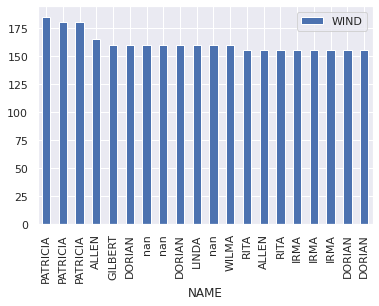

In [38]:
df.sort_values(by = "WIND", ascending = False).head(20).plot.bar(x="NAME",y="WIND");

### 6) Plot the count of all datapoints by Basin as a bar chart

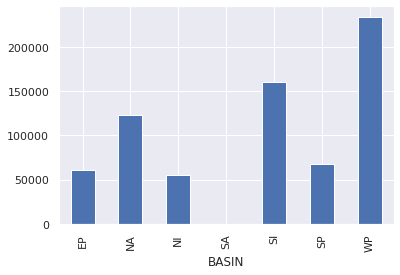

In [39]:
df.groupby("BASIN").size().plot.bar();

### 7) Plot the count of unique hurricanes by Basin as a bar chart.

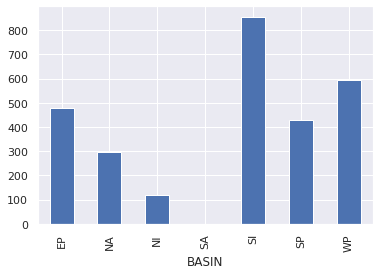

In [40]:
df.groupby("BASIN")["NAME"].nunique().plot.bar();

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude. See [here](https://seaborn.pydata.org/examples/hexbin_marginals.html) for example

In [41]:
import seaborn as sns

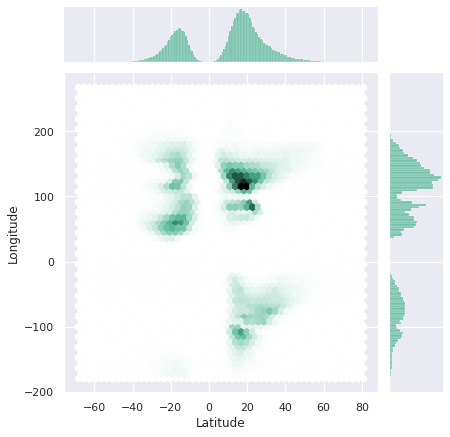

In [42]:
lat = df["LAT"].values
lon = df["LON"].values
ax = sns.jointplot(x=lat, y=lon, kind="hex", color="#4CB391")
ax.set_axis_labels(xlabel = "Latitude", ylabel = "Longitude");

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [43]:
katrina_sid = df[(df["NAME"] == "KATRINA") & (df["SEASON"] == 2005)]["SID"].unique()[0]
katrina_sid

'2005236N23285'

Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

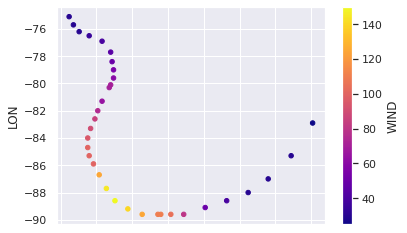

In [44]:
df[df["SID"] == katrina_sid].plot.scatter(x="LAT", y="LON", c="WIND", colormap = "plasma");

### 10) Make time the index on your dataframe

In [45]:
df.set_index("ISO_TIME", inplace = True)
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1842-10-25 03:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.9000,80.3000,NaN,NaN
1842-10-25 06:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8709,79.8265,NaN,NaN
1842-10-25 09:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8431,79.3524,NaN,NaN
1842-10-25 12:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8188,78.8772,NaN,NaN
1842-10-25 15:00:00,1842298N11080,1842,1,NI,BB,NaN,NR,10.8000,78.4000,NaN,NaN


### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample` to yearly data


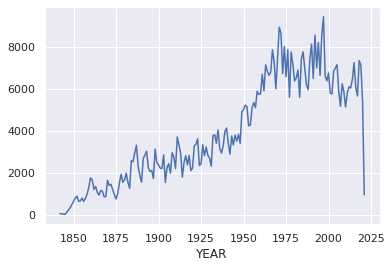

In [46]:
ax = df.groupby("SEASON")["SID"].count().plot()
ax.set_xlabel("YEAR");

###12) Create a  filtered Pandas dataframe consisting only of Atlantic tropical cyclones since 1979, ranging from tropical storms to hurricanes (see [link](https://www.ncei.noaa.gov/news/inventory-tropical-cyclone-tracks) for details on TC categories). Store this as a new dataframe, named NA_TCs

In [47]:
NA_TCs = df[(df["BASIN"] == "NA") & (df["SEASON"] >= 1979) & (df["WIND"] >= (39/1.15078))]
NA_TCs.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1979-06-22 00:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-54.7,35.0,1007.0
1979-06-22 06:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-55.8,40.0,1005.0
1979-06-22 12:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-56.9,50.0,1006.0
1979-06-22 18:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.1,-58.3,40.0,1008.0
1979-06-23 00:00:00,1979171N10315,1979,45,NA,CS,ANA,TS,14.1,-59.8,35.0,1010.0


### 13) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

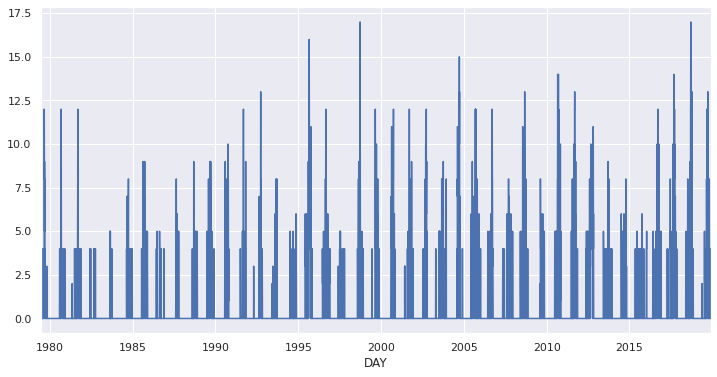

In [48]:
ax = NA_TCs.resample("D")["SID"].count().plot(figsize=(12, 6))
ax.set_xlabel("DAY");

###14) Using the categories based on wind speed, assign a class to each row in the dataframe, ranging from tropical cyclones through category 5 hurricanes

In [49]:
import numpy as np

In [50]:
TC_bins_mph = [38, 73, 95, 110, 130, 155, np.inf]
TC_bins_knot = [i/1.15078 for i in TC_bins_mph]
TC_labels = ["tropical storm", "category 1", "category 2", "category 3", "category 4", "category 5"]
NA_TCs.loc[:, "CLASS"] = pd.cut(NA_TCs["WIND"].values, TC_bins_knot, labels = TC_labels)
NA_TCs.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES,CLASS
ISO_TIME,,,,,,,,,,,,
1979-06-22 00:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-54.7,35.0,1007.0,tropical storm
1979-06-22 06:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-55.8,40.0,1005.0,tropical storm
1979-06-22 12:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.2,-56.9,50.0,1006.0,tropical storm
1979-06-22 18:00:00,1979171N10315,1979,45,NA,NA,ANA,TS,14.1,-58.3,40.0,1008.0,tropical storm
1979-06-23 00:00:00,1979171N10315,1979,45,NA,CS,ANA,TS,14.1,-59.8,35.0,1010.0,tropical storm


###15) Create a histogram plot of the wind speed for all North Atlantic tropical cyclones

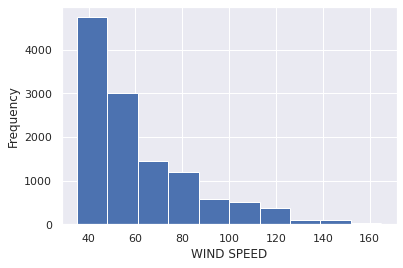

In [51]:
ax = NA_TCs["WIND"].plot.hist()
ax.set_xlabel("WIND SPEED");

###16) Create a scatter plot showing the relationship between wind speed and pressure for all NA tropical cyclones

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


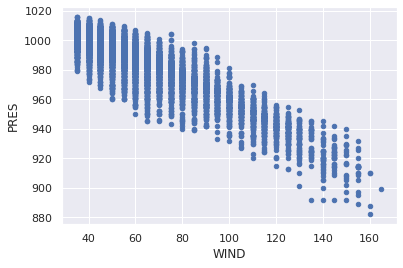

In [52]:
NA_TCs.plot.scatter(x="WIND", y="PRES");

###17) Fit a polynomial regression curve to fit a model to the speed vs. pressure data

Use the following code from Scikit-learn

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

Set the feature vector X and the target y in the following code. Recall the size of X should be [N samples, N_features] (the number of features here should be one) and the size of y should be [N samples,1]

In [54]:
X = NA_TCs[NA_TCs.PRES.notnull()].WIND[:, np.newaxis]
y = NA_TCs[NA_TCs.PRES.notnull()].PRES

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


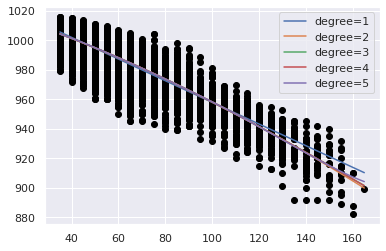

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(X.min(), X.max(), 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 2, 3, 4, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.legend(loc='best');

Generate the training and validation curve for different polynomial degrees

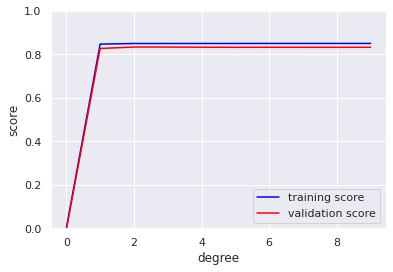

In [56]:
degree = np.arange(0, 10)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

What do you think is the best choice for the polynomial degree? Could you make a physical argment for why one particular choice might be the best? Hint: recall dimensional analysis

*Degree two is best, as the residuals are lower and the score is slightly higher than degree one. A physical argument is that wind speed squared is related to pressure by the Bernoulli equation. Additionally, lower degree models use less memory storage and have faster computations.*
 

###18) Walk through [this Notebook](https://colab.research.google.com/drive/1lCRVOHgJ8gvEvQMLxFPwLcxGlSfQ8ui-?usp=sharing) that uses ERA5 data for pressure and Sea Surface Temperature distributions around tropical cyclone centers to train a ML model. Be sure to follow the PCA analysis and the random forest model setup. Discuss how well the Random Forest model performs in predicting the wind speed. How does it compare to your polynomial regression above? What may be some reasons for differences?

*The random forest model is not very good at predicting wind speed, especially for category 1, 2, and 4 hurricanes. The extremely low average cross-validation score also supports this evaluation. The random forest model scores lower than the polynomial regression model for all tropical cyclones except for category 3 hurricanes. Random forest models are unable to predict time series trends, and that in conjunction with the fact that the data displays a linear trend, are reasons why the random forest model is worse than the polynomial regression model.*